In [3]:
#!pip install quandl
#import quandl
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from pandas import datetime
from math import sqrt
import yfinance as yf



In [ ]:
#quandl.ApiConfig.api_key = "Please Use Your Own Api Key from Quandl"

In [4]:
df = pd.read_csv("D:/Projects/ML_Project/Scraped_Data/AAPL.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Open-Close,High-Low,target
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,0.000000,0.000558,-1
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,0.000558,0.000558,-1
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.000558,0.000558,1
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.000000,0.000558,1
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.000000,0.000558,1


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume,Open-Close,High-Low,target
10982,2024-07-09,227.929993,229.399994,226.369995,228.679993,48076100,-0.750000,3.029999,1
10983,2024-07-10,229.300003,233.080002,229.250000,232.979996,62627700,-3.679993,3.830002,-1
10984,2024-07-11,231.389999,232.389999,225.770004,227.570007,64710600,3.819992,6.619995,1
10985,2024-07-12,228.919998,232.639999,228.679993,230.539993,53008200,-1.619995,3.960007,1
10986,2024-07-15,236.479996,237.229996,233.089996,234.399994,62549700,2.080002,4.139999,-1


In [12]:
df=df[['Open','High','Low','Close']]

In [13]:

df.head()

,Open,High,Low,Close
0,0.128348,0.128906,0.128348,0.128348
1,0.122210,0.122210,0.121652,0.121652
2,0.113281,0.113281,0.112723,0.112723
3,0.115513,0.116071,0.115513,0.115513
4,0.118862,0.119420,0.118862,0.118862


In [8]:
#df['High'] = df['High'] / 100000
#df['Open'] = df['Open'] / 100000
#df['Low'] = df['Low'] / 100000
#df['Close'] = df['Close'] / 100000
#print(df.head())
#print(df.tail())

                Open      High       Low     Close
Date                                              
2013-01-01  0.129270  0.133800  0.128799  0.132433
2013-01-02  0.133124  0.134350  0.132560  0.133162
2013-01-03  0.133510  0.133660  0.131241  0.132791
2013-01-04  0.132400  0.134184  0.132213  0.133611
2013-01-07  0.133750  0.134400  0.132650  0.132888
                Open      High       Low     Close
Date                                              
2018-05-14  0.747500  0.751527  0.745154  0.747374
2018-05-15  0.748500  0.755990  0.743416  0.746049
2018-05-16  0.745000  0.750989  0.739781  0.748734
2018-05-17  0.748034  0.752769  0.744000  0.745599
2018-05-18  0.745550  0.755090  0.739251  0.742062


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(df[['Open','High','Low','Close']])

In [27]:
#data=data.to_numpy()
data


array([[3.32795680e-04, 3.34095986e-04, 3.40030425e-04, 3.38129690e-04],
       [3.06834588e-04, 3.05864331e-04, 3.11297299e-04, 3.09557179e-04],
       [2.69068677e-04, 2.68217842e-04, 2.72982138e-04, 2.71456195e-04],
       ...,
       [9.78471475e-01, 9.79593602e-01, 9.68589237e-01, 9.70855726e-01],
       [9.68024417e-01, 9.80647652e-01, 9.81076267e-01, 9.83528969e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [28]:
result = []
sequence_length = 6
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
    
result = np.array(result)

row = round(0.8 * result.shape[0])

#creating training data
train = result[:int(row), :]

x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]

amount_of_features = len(df.columns)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features)) 

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (8785, 5, 4)
y_train (8785,)
X_test (2196, 5, 4)
y_test (2196,)


In [30]:
import math
#importing keras modules
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D ,MaxPooling1D
from tensorflow.keras.layers import LSTM
from keras import losses

In [31]:
from keras import optimizers
def build_model(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(LSTM(32, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
        #model.add(Dropout(d))
        model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
        model.compile(loss='mse',optimizer='adam',metrics=['mae'])
        return model

In [32]:
model = build_model([4,5,1])
#Summary of the Model
print(model.summary())

C:\Users\Mohamed Tharif\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 128)              │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,249 (348.63 KB)

 Trainable params: 89,249 (348.63 KB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=25,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Epoch 1/25
55/55 - 8s - 142ms/step - loss: 3.0658e-05 - mae: 0.0032 - val_loss: 0.0055 - val_mae: 0.0658
Epoch 2/25
55/55 - 1s - 14ms/step - loss: 2.9294e-05 - mae: 0.0033 - val_loss: 0.0055 - val_mae: 0.0655
Epoch 3/25
55/55 - 1s - 14ms/step - loss: 2.9193e-05 - mae: 0.0032 - val_loss: 0.0052 - val_mae: 0.0633
Epoch 4/25
55/55 - 1s - 13ms/step - loss: 2.1151e-05 - mae: 0.0027 - val_loss: 6.4683e-04 - val_mae: 0.0220
Epoch 5/25
55/55 - 1s - 13ms/step - loss: 1.1893e-06 - mae: 7.4284e-04 - val_loss: 1.2498e-04 - val_mae: 0.0091
Epoch 6/25
55/55 - 1s - 13ms/step - loss: 6.3988e-07 - mae: 5.1543e-04 - val_loss: 8.3844e-05 - val_mae: 0.0071
Epoch 7/25
55/55 - 1s - 13ms/step - loss: 5.6671e-07 - mae: 4.6755e-04 - val_loss: 1.0710e-04 - val_mae: 0.0082
Epoch 8/25
55/55 - 1s - 13ms/step - loss: 4.7464e-07 - mae: 4.2303e-04 - val_loss: 1.2338e-04 - val_mae: 0.0089
Epoch 9/25
55/55 - 1s - 14ms/step - loss: 4.3384e-07 - mae: 3.8010e-04 - val_loss: 1.3789e-04 - val_mae: 0.0095
Epoch 10/25
55/55 -

In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [35]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

C:\Users\Mohamed Tharif\AppData\Local\Temp\ipykernel_5464\960448302.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
C:\Users\Mohamed Tharif\AppData\Local\Temp\ipykernel_5464\960448302.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')


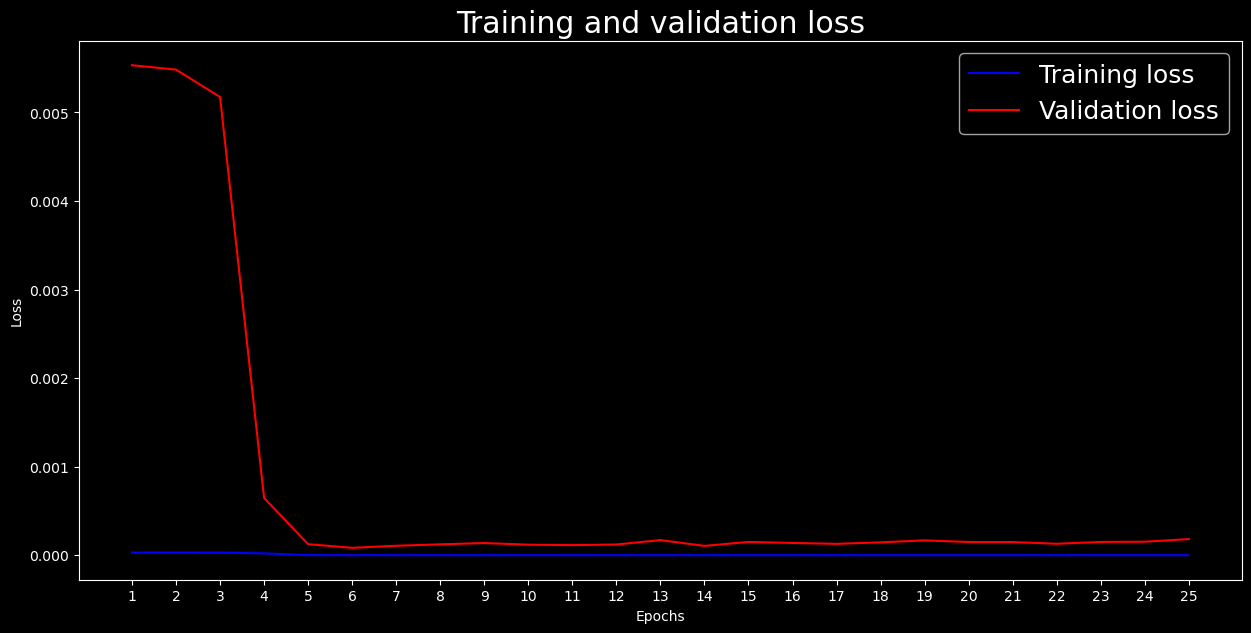

In [36]:


import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/25/mrftest&validationlossconv1dlstm.png', dpi=300)
plt.show()

C:\Users\Mohamed Tharif\AppData\Local\Temp\ipykernel_5464\1360073595.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
C:\Users\Mohamed Tharif\AppData\Local\Temp\ipykernel_5464\1360073595.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, vmae, 'b',color='red', label='Validation error')


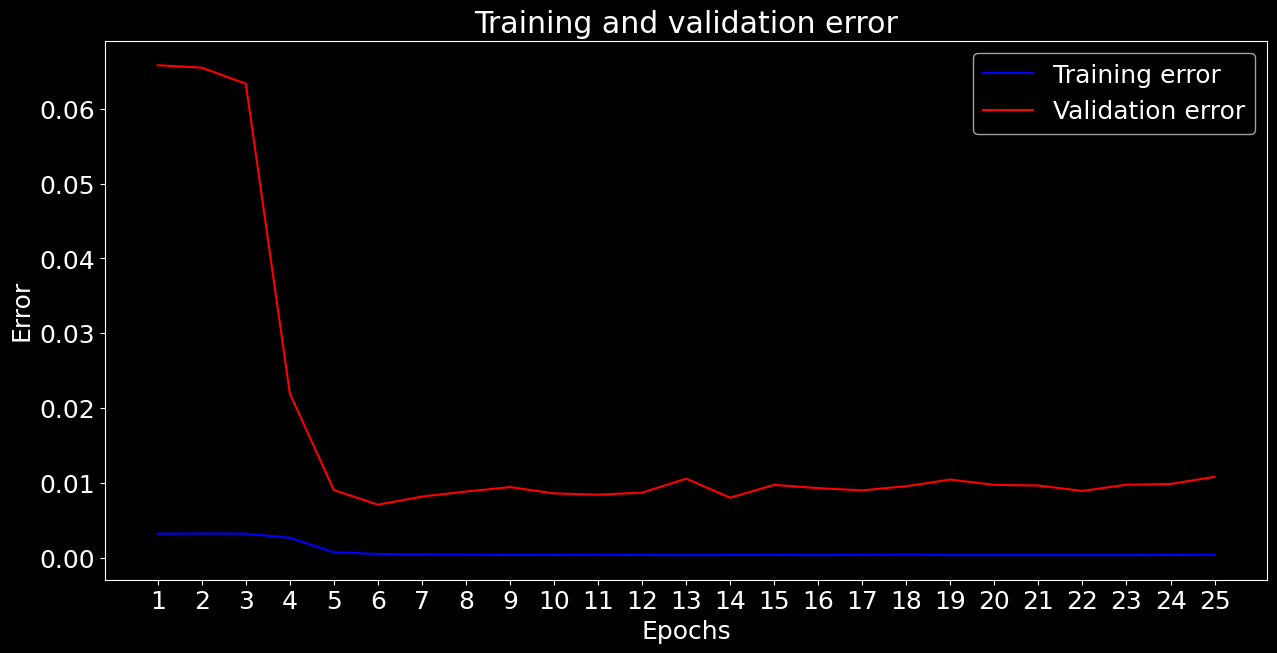

In [37]:
mae = history_dict['mae']
vmae = history_dict['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='red', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/25/mrftest&validationerrorconv1dlstm.png', dpi=300)
plt.show()

In [38]:
model.metrics_names

['loss', 'compile_metrics']

In [39]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

In [40]:
#predicting values for y_test
p = model.predict(x_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


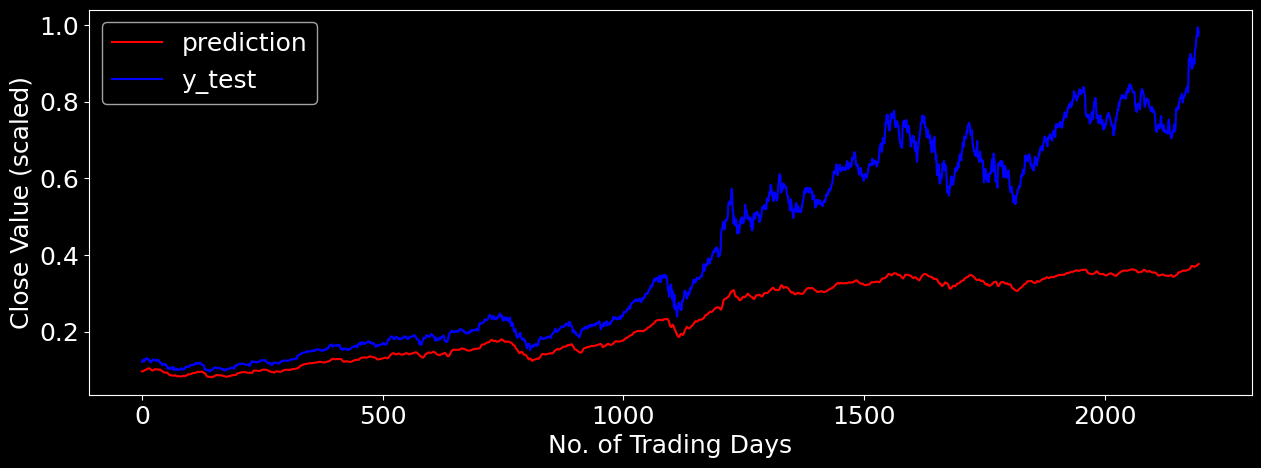

In [51]:
plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/25/mrftestconv1dlstm.png', dpi=300)
plt.show()

In [42]:
p1= model.predict(x_train)

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


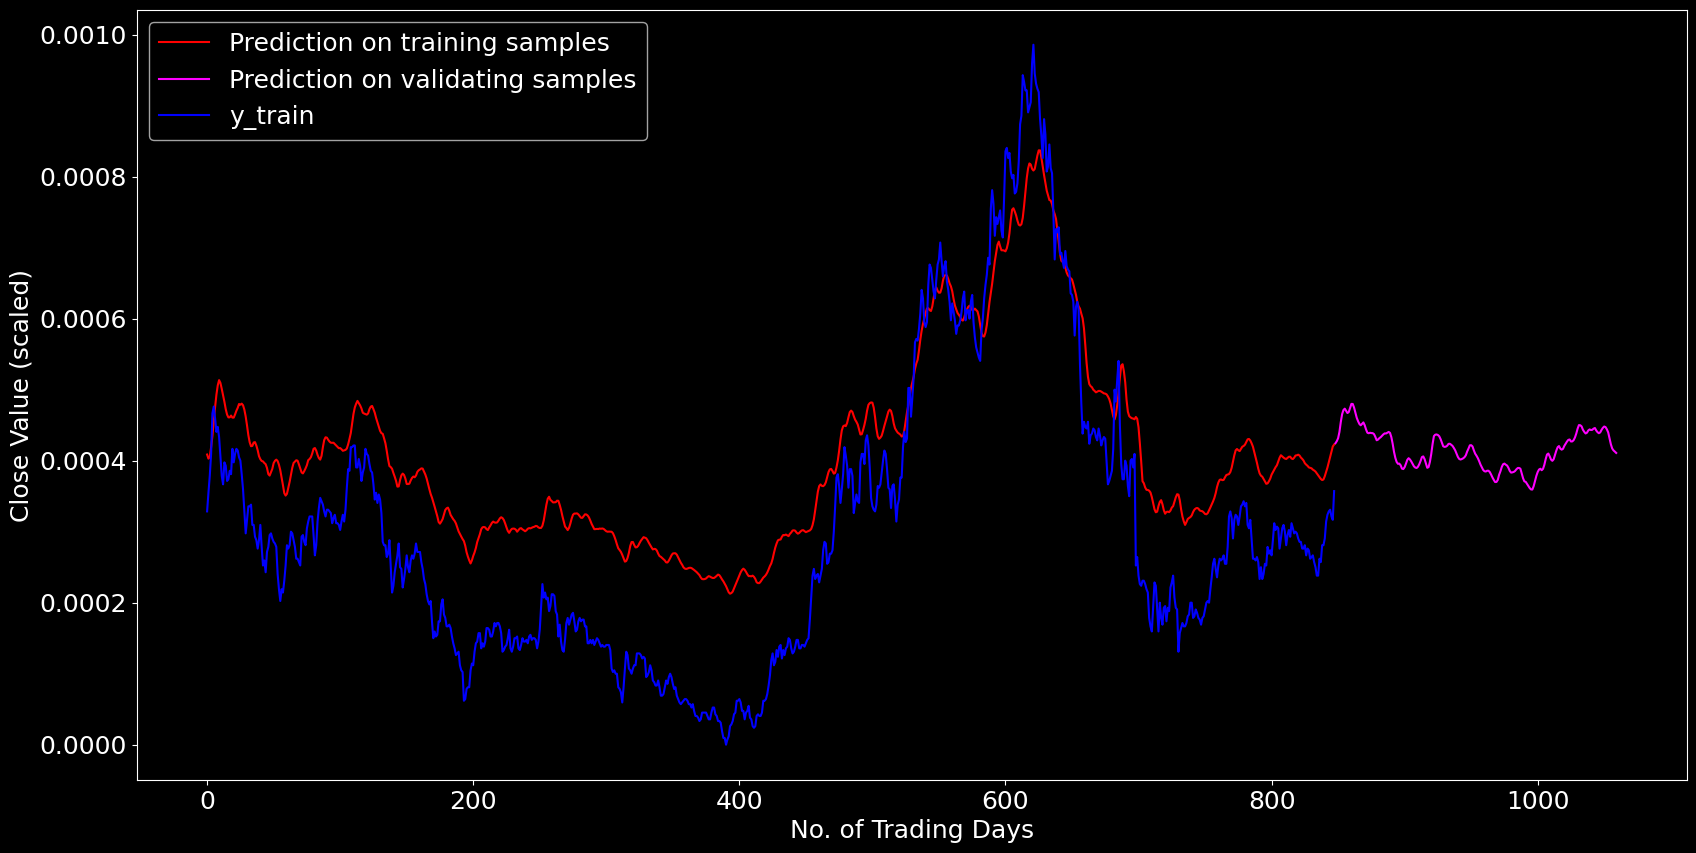

In [52]:
# Check the length of p1[848:] and ensure it matches the length of x
p1_validation = p1[848:848+len(x)]

plt.plot(p1[:848], color='red', label='Prediction on training samples')
plt.plot(x, p1_validation, color='magenta', label='Prediction on validating samples')
plt.plot(y_train[:848], color='blue', label='y_train')  # Adjusting y_train to match the length of the training predictions
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()


In [55]:
# Reshape to a 1D array with 2196 elements (or any other compatible shape)
y_pred = p.reshape(2196)  # Keeps all elements in a single array



In [56]:
from sklearn.metrics import mean_absolute_error

In [57]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.006049640 		 0.002356040 		 0.235984750 		 0.177589908


In [58]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 40592.919157750 			 99.999351822


Y shape: (10981,)
P shape: (10981, 1)


<module 'matplotlib.pyplot' from 'C:\\Users\\Mohamed Tharif\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

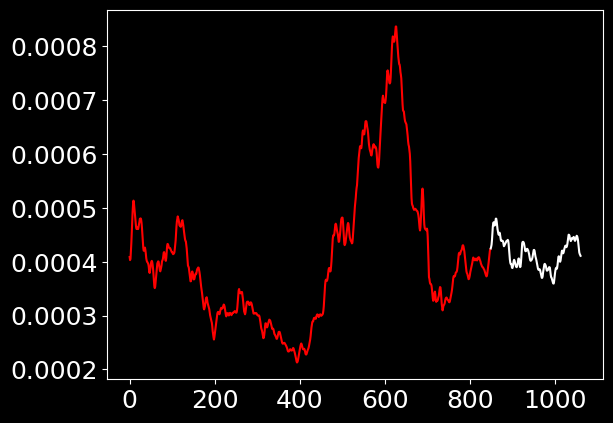

In [60]:
# Ensure that Y and P have the same shape after concatenation
Y = np.concatenate((y_train, y_test), axis=0)
P = np.concatenate((p1, p), axis=0)

# Check shapes
print("Y shape:", Y.shape)
print("P shape:", P.shape)

# Plotting the complete Y set with predicted values on training, validating, and testing samples

# For training samples
plt.plot(P[:848], color='red', label='Prediction on training samples')

# For validating samples
z = np.array(range(848, 1060))
plt.plot(z, P[848:1060], color='white', label='Prediction on validating samples')

# For testing samples
x = np.array(range(1060, 1060 + len(P[1060:])))  # Adjust to match the length of P[1060:]
plt
